# FluVaccine task generation

In [1]:
# General importations.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import string
from random import shuffle,seed,choices
from faker import Faker
from faker.providers.person.en import Provider
import networkx as nx
import itertools

from utils import Utils
from flu_vaccine import FluVaccine
from dataset_generator import DataSetGenerator

In [2]:
u = Utils()
dg = DataSetGenerator()

## Error test (low complexity)

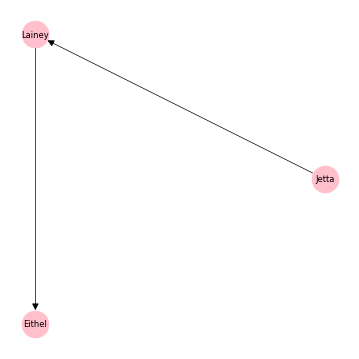


Causal context: A group of friends is considering whether or not to get vaccinated against the flu this year. Jetta will get vaccinated if she had a high fever or bronchitis for at least 7 days in the previous flu season. Lainey will get vaccinated if she had a high fever or bronchitis for at least 4 days in the previous flu season or if Jetta gets vaccinated. Eithel will get vaccinated if she had a high fever or bronchitis for at least 4 days in the previous flu season or if Lainey gets vaccinated. 

Sample context:  During the previous flu season, Jetta had a cough for 7 days, a low-grade fever for 6 days, stomach pain for 5 days, a runny nose for 4 days, a high fever for 9 days, and bronchitis for 7 days. Lainey had a low-grade fever for 3 days, a high fever for 3 days, a cough for 7 days, bronchitis for 3 days, stomach pain for 7 days, and a runny nose for 9 days. Eithel had bronchitis for 4 days, a cough for 3 days, a high fever for 6 days, a runny nose for 5 days, a low-grade fe

In [3]:
size = [2,2]
tg = FluVaccine(n_per_bcc = size, 
                bcc_types = ["cycle"]*len(size))
causal_context = tg.get_causal_context()
sample_context = tg.get_sample_context()
print()
print("Causal context:", causal_context)
print()
print("Sample context:", sample_context)
print()
print("- Global cause-effect pairs:", tg.get_global())
print("- Local cause-effect pairs:", tg.get_local())
print("- Compositions:", tg.get_compositions())
print("- Causal functions:", tg.causal_functions)

In [4]:
print()
print("- Factual queries:")
display(tg.get_factual_queries())


- Factual queries:


{'Eithel': {'Prompt': 'Did Eithel get vaccinated? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Jetta': 1, 'Lainey': 1, 'Eithel': 1},
  'True exogenous': {'QXK6': 1, 'T4HT': 0, '0FN5': 1},
  'True response': 1},
 'Lainey': {'Prompt': 'Did Lainey get vaccinated? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Jetta': 1, 'Lainey': 1, 'Eithel': 1},
  'True exogenous': {'QXK6': 1, 'T4HT': 0, '0FN5': 1},
  'True response': 1}}

In [5]:
cf_1, cf_0 = tg.get_counterfactual_queries()
print("- Counterfactual queries (cause = True):")
for key,val in cf_1.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = True):

-----------------------

-- ('Jetta', 'Eithel') --
Prompt: Now, suppose that Jetta got vaccinated regardless of all other circumstances. With this new assumption, did Eithel get vaccinated? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Jetta': 1, 'Lainey': 1, 'Eithel': 1}
True exogenous: {'QXK6': 1, 'T4HT': 0, '0FN5': 1}
True response: 1

-----------------------

-- ('Jetta', 'Lainey') --
Prompt: Now, suppose that Jetta got vaccinated regardless of all other circumstances. With this new assumption, did Lainey get vaccinated? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Jetta': 1, 'Lainey': 1, 'Eithel': 1}
True exogenous: {'QXK6': 1, 'T4HT': 0, '0FN5': 1}
True response: 1

-----------------------

-- ('Lainey', 'Eithel') --
Prompt: Now, suppose that Lainey got vaccinated regardless of all other circumstances. With this new assumption, did Eithel get vaccinated? Begin 

In [6]:
print("- Counterfactual queries (cause = False):")
for key,val in cf_0.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = False):

-----------------------

-- ('Jetta', 'Eithel') --
Prompt: Now, suppose that Jetta did not get vaccinated regardless of all other circumstances. With this new assumption, did Eithel get vaccinated? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Jetta': 0, 'Lainey': 0, 'Eithel': 1}
True exogenous: {'QXK6': 1, 'T4HT': 0, '0FN5': 1}
True response: 1

-----------------------

-- ('Jetta', 'Lainey') --
Prompt: Now, suppose that Jetta did not get vaccinated regardless of all other circumstances. With this new assumption, did Lainey get vaccinated? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Jetta': 0, 'Lainey': 0, 'Eithel': 1}
True exogenous: {'QXK6': 1, 'T4HT': 0, '0FN5': 1}
True response: 0

-----------------------

-- ('Lainey', 'Eithel') --
Prompt: Now, suppose that Lainey did not get vaccinated regardless of all other circumstances. With this new assumption, did Eith

In [7]:
# Test observational data generation.
df_obs, df_noise = tg.sample_scm(n = 5,
                                 intervene_node = None,
                                 intervene_value = 0)
display(df_obs.head())
display(df_noise.head())

,Jetta,Lainey,Eithel
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


,QXK6,T4HT,0FN5
0,1,0,0
1,1,1,1
2,1,1,1
3,1,0,1
4,1,0,1


In [8]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 1
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())


-- Lainey = 1 --


,Jetta,Lainey,Eithel
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


,QXK6,T4HT,0FN5
0,1,0,0
1,1,1,1
2,1,1,1
3,1,0,1
4,1,0,1



-- Jetta = 1 --


,Jetta,Lainey,Eithel
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


,QXK6,T4HT,0FN5
0,1,0,0
1,1,1,1
2,1,1,1
3,1,0,1
4,1,0,1


In [9]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 0
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())


-- Lainey = 0 --


,Jetta,Lainey,Eithel
0,1,0,0
1,1,0,1
2,1,0,1
3,1,0,1
4,1,0,1


,QXK6,T4HT,0FN5
0,1,0,0
1,1,1,1
2,1,1,1
3,1,0,1
4,1,0,1



-- Jetta = 0 --


,Jetta,Lainey,Eithel
0,0,0,0
1,0,1,1
2,0,1,1
3,0,0,1
4,0,0,1


,QXK6,T4HT,0FN5
0,1,0,0
1,1,1,1
2,1,1,1
3,1,0,1
4,1,0,1


## Error test (moderate complexity)

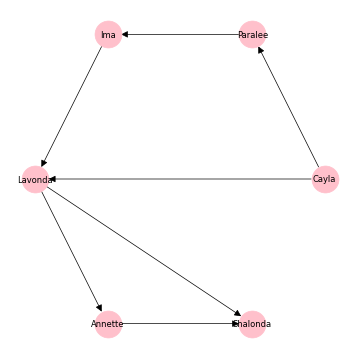


Causal context: A group of friends is considering whether or not to get vaccinated against the flu this year. Cayla will get vaccinated if she had a high fever or bronchitis for at least 5 days in the previous flu season. Paralee will get vaccinated if she had a high fever or bronchitis for at least 4 days in the previous flu season or if Cayla gets vaccinated. Ima will get vaccinated if she had a high fever or bronchitis for at least 8 days in the previous flu season or if Paralee gets vaccinated. Lavonda will get vaccinated if she had a high fever or bronchitis for at least 5 days in the previous flu season and Cayla gets vaccinated and Ima gets vaccinated. Annette will get vaccinated if she had a high fever or bronchitis for at least 5 days in the previous flu season and Lavonda gets vaccinated. Shalonda will get vaccinated if she had a high fever or bronchitis for at least 7 days in the previous flu season or if Lavonda gets vaccinated or if Annette gets vaccinated. 

Sample conte

In [10]:
size = [4,3]
tg = FluVaccine(n_per_bcc = size, 
                bcc_types = ["cycle"]*len(size))
causal_context = tg.get_causal_context()
sample_context = tg.get_sample_context()
print()
print("Causal context:", causal_context)
print()
print("Sample context:", sample_context)
print()
print("- Global cause-effect pairs:", tg.get_global())
print("- Local cause-effect pairs:", tg.get_local())
print("- Compositions:", tg.get_compositions())
print("- Causal functions:", tg.causal_functions)

In [11]:
print()
print("- Factual queries:")
display(tg.get_factual_queries())


- Factual queries:


{'Shalonda': {'Prompt': 'Did Shalonda get vaccinated? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Cayla': 1,
   'Paralee': 1,
   'Ima': 1,
   'Lavonda': 0,
   'Annette': 0,
   'Shalonda': 0},
  'True exogenous': {'7VE3': 1,
   'R98Q': 0,
   'QDL5': 1,
   '4MB3': 0,
   'XXNH': 0,
   '93XJ': 0},
  'True response': 0},
 'Lavonda': {'Prompt': 'Did Lavonda get vaccinated? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Cayla': 1,
   'Paralee': 1,
   'Ima': 1,
   'Lavonda': 0,
   'Annette': 0,
   'Shalonda': 0},
  'True exogenous': {'7VE3': 1,
   'R98Q': 0,
   'QDL5': 1,
   '4MB3': 0,
   'XXNH': 0,
   '93XJ': 0},
  'True response': 0}}

In [12]:
cf_1, cf_0 = tg.get_counterfactual_queries()
print("- Counterfactual queries (cause = True):")
for key,val in cf_1.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = True):

-----------------------

-- ('Cayla', 'Shalonda') --
Prompt: Now, suppose that Cayla got vaccinated regardless of all other circumstances. With this new assumption, did Shalonda get vaccinated? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Cayla': 1, 'Paralee': 1, 'Ima': 1, 'Lavonda': 0, 'Annette': 0, 'Shalonda': 0}
True exogenous: {'7VE3': 1, 'R98Q': 0, 'QDL5': 1, '4MB3': 0, 'XXNH': 0, '93XJ': 0}
True response: 0

-----------------------

-- ('Cayla', 'Lavonda') --
Prompt: Now, suppose that Cayla got vaccinated regardless of all other circumstances. With this new assumption, did Lavonda get vaccinated? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Cayla': 1, 'Paralee': 1, 'Ima': 1, 'Lavonda': 0, 'Annette': 0, 'Shalonda': 0}
True exogenous: {'7VE3': 1, 'R98Q': 0, 'QDL5': 1, '4MB3': 0, 'XXNH': 0, '93XJ': 0}
True response: 0

-----------------------

-- ('Lavonda', 'Sha

In [13]:
print("- Counterfactual queries (cause = False):")
for key,val in cf_0.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = False):

-----------------------

-- ('Cayla', 'Shalonda') --
Prompt: Now, suppose that Cayla did not get vaccinated regardless of all other circumstances. With this new assumption, did Shalonda get vaccinated? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Cayla': 0, 'Paralee': 0, 'Ima': 1, 'Lavonda': 0, 'Annette': 0, 'Shalonda': 0}
True exogenous: {'7VE3': 1, 'R98Q': 0, 'QDL5': 1, '4MB3': 0, 'XXNH': 0, '93XJ': 0}
True response: 0

-----------------------

-- ('Cayla', 'Lavonda') --
Prompt: Now, suppose that Cayla did not get vaccinated regardless of all other circumstances. With this new assumption, did Lavonda get vaccinated? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Cayla': 0, 'Paralee': 0, 'Ima': 1, 'Lavonda': 0, 'Annette': 0, 'Shalonda': 0}
True exogenous: {'7VE3': 1, 'R98Q': 0, 'QDL5': 1, '4MB3': 0, 'XXNH': 0, '93XJ': 0}
True response: 0

-----------------------

--

In [14]:
# Test observational data generation.
df_obs, df_noise = tg.sample_scm(n = 5,
                                 intervene_node = None,
                                 intervene_value = 0)
display(df_obs.head())
display(df_noise.head())

,Cayla,Paralee,Ima,Lavonda,Annette,Shalonda
0,1,1,1,1,0,1
1,1,1,1,0,0,0
2,0,1,1,0,0,1
3,0,0,0,0,0,1
4,0,0,1,0,0,1


,7VE3,R98Q,QDL5,4MB3,XXNH,93XJ
0,1,0,1,1,0,0
1,1,1,1,0,0,0
2,0,1,1,0,1,1
3,0,0,0,1,0,1
4,0,0,1,1,0,1


In [15]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 1
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())


-- Lavonda = 1 --


,Cayla,Paralee,Ima,Lavonda,Annette,Shalonda
0,1,1,1,1,0,1
1,1,1,1,1,0,1
2,0,1,1,1,1,1
3,0,0,0,1,0,1
4,0,0,1,1,0,1


,7VE3,R98Q,QDL5,4MB3,XXNH,93XJ
0,1,0,1,1,0,0
1,1,1,1,0,0,0
2,0,1,1,0,1,1
3,0,0,0,1,0,1
4,0,0,1,1,0,1



-- Cayla = 1 --


,Cayla,Paralee,Ima,Lavonda,Annette,Shalonda
0,1,1,1,1,0,1
1,1,1,1,0,0,0
2,1,1,1,0,0,1
3,1,1,1,1,0,1
4,1,1,1,1,0,1


,7VE3,R98Q,QDL5,4MB3,XXNH,93XJ
0,1,0,1,1,0,0
1,1,1,1,0,0,0
2,0,1,1,0,1,1
3,0,0,0,1,0,1
4,0,0,1,1,0,1


In [16]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 0
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())


-- Lavonda = 0 --


,Cayla,Paralee,Ima,Lavonda,Annette,Shalonda
0,1,1,1,0,0,0
1,1,1,1,0,0,0
2,0,1,1,0,0,1
3,0,0,0,0,0,1
4,0,0,1,0,0,1


,7VE3,R98Q,QDL5,4MB3,XXNH,93XJ
0,1,0,1,1,0,0
1,1,1,1,0,0,0
2,0,1,1,0,1,1
3,0,0,0,1,0,1
4,0,0,1,1,0,1



-- Cayla = 0 --


,Cayla,Paralee,Ima,Lavonda,Annette,Shalonda
0,0,0,1,0,0,0
1,0,1,1,0,0,0
2,0,1,1,0,0,1
3,0,0,0,0,0,1
4,0,0,1,0,0,1


,7VE3,R98Q,QDL5,4MB3,XXNH,93XJ
0,1,0,1,1,0,0
1,1,1,1,0,0,0
2,0,1,1,0,1,1
3,0,0,0,1,0,1
4,0,0,1,1,0,1


In [17]:
glo = [tg.get_global()]
loc = tg.get_local()
comp = tg.get_compositions()

print(glo)
print(loc)
print(comp)

[('Cayla', 'Shalonda')]
[('Cayla', 'Lavonda'), ('Lavonda', 'Shalonda')]
[[('Cayla', 'Lavonda'), ('Lavonda', 'Shalonda')]]


In [18]:
# Get PNS and compare to ATE.
results_dict = dict()
for n in [5,10,50,100,500,1000,5000]:
    pair_dict = dict()
    for pair in glo+loc:
        df_cf, df_noise = tg.sample_scm(n = n,
                                        intervene_node = pair[0],
                                        intervene_value = 1)
        df_cf.rename(columns={pair[1]: 'True (cause = True)'}, inplace = True)
        df_cf_0, df_noise = tg.sample_scm(n = n,
                                          intervene_node = pair[0],
                                          intervene_value = 0)
        df_cf["True (cause = False)"] = df_cf_0[pair[1]]
        display(df_cf.head(5))
        print("\n-- {} | n = {} --".format(pair,n))
        pns = dg.get_pns_ate(df_cf)
        pair_dict[pair] = pns
    results_dict[n] = pair_dict

,Cayla,Paralee,Ima,Lavonda,Annette,True (cause = True),True (cause = False)
0,1,1,1,1,0,1,0
1,1,1,1,0,0,0,0
2,1,1,1,0,0,1,1
3,1,1,1,1,0,1,1
4,1,1,1,1,0,1,1



-- ('Cayla', 'Shalonda') | n = 5 --
-- PNS = 0.2 | ATE = 0.20000000000000007 --


,Cayla,Paralee,Ima,True (cause = True),Annette,Shalonda,True (cause = False)
0,1,1,1,1,0,1,0
1,1,1,1,0,0,0,0
2,1,1,1,0,0,1,0
3,1,1,1,1,0,1,0
4,1,1,1,1,0,1,0



-- ('Cayla', 'Lavonda') | n = 5 --
-- PNS = 0.6 | ATE = 0.6 --


,Cayla,Paralee,Ima,Lavonda,Annette,True (cause = True),True (cause = False)
0,1,1,1,1,0,1,0
1,1,1,1,1,0,1,0
2,0,1,1,1,1,1,1
3,0,0,0,1,0,1,1
4,0,0,1,1,0,1,1



-- ('Lavonda', 'Shalonda') | n = 5 --
-- PNS = 0.4 | ATE = 0.4 --


,Cayla,Paralee,Ima,Lavonda,Annette,True (cause = True),True (cause = False)
0,1,1,1,0,0,1,1
1,1,1,1,1,0,1,1
2,1,1,1,0,0,1,1
3,1,1,1,0,0,0,0
4,1,1,1,1,1,1,1



-- ('Cayla', 'Shalonda') | n = 10 --
-- PNS = 0.2 | ATE = 0.20000000000000007 --


,Cayla,Paralee,Ima,True (cause = True),Annette,Shalonda,True (cause = False)
0,1,1,1,0,0,1,0
1,1,1,1,1,0,1,0
2,1,1,1,0,0,1,0
3,1,1,1,0,0,0,0
4,1,1,1,1,1,1,0



-- ('Cayla', 'Lavonda') | n = 10 --
-- PNS = 0.4 | ATE = 0.4 --


,Cayla,Paralee,Ima,Lavonda,Annette,True (cause = True),True (cause = False)
0,1,1,1,1,0,1,1
1,1,1,1,1,0,1,1
2,0,1,1,1,1,1,1
3,0,1,1,1,1,1,0
4,0,1,1,1,1,1,1



-- ('Lavonda', 'Shalonda') | n = 10 --
-- PNS = 0.4 | ATE = 0.4 --


,Cayla,Paralee,Ima,Lavonda,Annette,True (cause = True),True (cause = False)
0,1,1,1,0,0,1,1
1,1,1,1,1,1,1,1
2,1,1,1,0,0,0,0
3,1,1,1,1,0,1,1
4,1,1,1,0,0,1,1



-- ('Cayla', 'Shalonda') | n = 50 --
-- PNS = 0.12 | ATE = 0.12 --


,Cayla,Paralee,Ima,True (cause = True),Annette,Shalonda,True (cause = False)
0,1,1,1,0,0,1,0
1,1,1,1,1,1,1,0
2,1,1,1,0,0,0,0
3,1,1,1,1,0,1,0
4,1,1,1,0,0,1,0



-- ('Cayla', 'Lavonda') | n = 50 --
-- PNS = 0.58 | ATE = 0.58 --


,Cayla,Paralee,Ima,Lavonda,Annette,True (cause = True),True (cause = False)
0,1,1,1,1,0,1,1
1,1,1,1,1,1,1,1
2,0,0,0,1,0,1,0
3,0,1,1,1,0,1,1
4,0,0,1,1,1,1,1



-- ('Lavonda', 'Shalonda') | n = 50 --
-- PNS = 0.2 | ATE = 0.19999999999999996 --


,Cayla,Paralee,Ima,Lavonda,Annette,True (cause = True),True (cause = False)
0,1,1,1,0,0,1,1
1,1,1,1,0,0,1,1
2,1,1,1,0,0,1,1
3,1,1,1,1,0,1,1
4,1,1,1,1,1,1,0



-- ('Cayla', 'Shalonda') | n = 100 --
-- PNS = 0.14 | ATE = 0.14 --


,Cayla,Paralee,Ima,True (cause = True),Annette,Shalonda,True (cause = False)
0,1,1,1,0,0,1,0
1,1,1,1,0,0,1,0
2,1,1,1,0,0,1,0
3,1,1,1,1,0,1,0
4,1,1,1,1,1,1,0



-- ('Cayla', 'Lavonda') | n = 100 --
-- PNS = 0.43 | ATE = 0.43 --


,Cayla,Paralee,Ima,Lavonda,Annette,True (cause = True),True (cause = False)
0,1,1,1,1,1,1,1
1,1,1,1,1,0,1,1
2,0,1,1,1,1,1,1
3,0,1,1,1,0,1,1
4,0,1,1,1,1,1,0



-- ('Lavonda', 'Shalonda') | n = 100 --
-- PNS = 0.28 | ATE = 0.28 --


,Cayla,Paralee,Ima,Lavonda,Annette,True (cause = True),True (cause = False)
0,1,1,1,1,1,1,1
1,1,1,1,0,0,1,1
2,1,1,1,1,1,1,1
3,1,1,1,1,0,1,1
4,1,1,1,1,1,1,0



-- ('Cayla', 'Shalonda') | n = 500 --
-- PNS = 0.146 | ATE = 0.14600000000000002 --


,Cayla,Paralee,Ima,True (cause = True),Annette,Shalonda,True (cause = False)
0,1,1,1,1,1,1,0
1,1,1,1,0,0,1,0
2,1,1,1,1,1,1,0
3,1,1,1,1,0,1,0
4,1,1,1,1,1,1,0



-- ('Cayla', 'Lavonda') | n = 500 --
-- PNS = 0.51 | ATE = 0.51 --


,Cayla,Paralee,Ima,Lavonda,Annette,True (cause = True),True (cause = False)
0,1,1,1,1,1,1,1
1,1,1,1,1,0,1,1
2,0,0,1,1,1,1,1
3,0,0,1,1,0,1,1
4,0,1,1,1,1,1,0



-- ('Lavonda', 'Shalonda') | n = 500 --
-- PNS = 0.278 | ATE = 0.278 --


,Cayla,Paralee,Ima,Lavonda,Annette,True (cause = True),True (cause = False)
0,1,1,1,0,0,0,0
1,1,1,1,1,1,1,1
2,1,1,1,0,0,1,1
3,1,1,1,1,1,1,1
4,1,1,1,1,0,1,0



-- ('Cayla', 'Shalonda') | n = 1000 --
-- PNS = 0.166 | ATE = 0.16600000000000004 --


,Cayla,Paralee,Ima,True (cause = True),Annette,Shalonda,True (cause = False)
0,1,1,1,0,0,0,0
1,1,1,1,1,1,1,0
2,1,1,1,0,0,1,0
3,1,1,1,1,1,1,0
4,1,1,1,1,0,1,0



-- ('Cayla', 'Lavonda') | n = 1000 --
-- PNS = 0.495 | ATE = 0.495 --


,Cayla,Paralee,Ima,Lavonda,Annette,True (cause = True),True (cause = False)
0,1,1,1,1,0,1,0
1,1,1,1,1,1,1,1
2,0,0,0,1,0,1,1
3,0,0,1,1,1,1,1
4,0,1,1,1,0,1,0



-- ('Lavonda', 'Shalonda') | n = 1000 --
-- PNS = 0.311 | ATE = 0.31100000000000005 --


,Cayla,Paralee,Ima,Lavonda,Annette,True (cause = True),True (cause = False)
0,1,1,1,0,0,1,1
1,1,1,1,1,0,1,0
2,1,1,1,1,1,1,1
3,1,1,1,0,0,0,0
4,1,1,1,0,0,1,1



-- ('Cayla', 'Shalonda') | n = 5000 --
-- PNS = 0.1452 | ATE = 0.1452 --


,Cayla,Paralee,Ima,True (cause = True),Annette,Shalonda,True (cause = False)
0,1,1,1,0,0,1,0
1,1,1,1,1,0,1,0
2,1,1,1,1,1,1,0
3,1,1,1,0,0,0,0
4,1,1,1,0,0,1,0



-- ('Cayla', 'Lavonda') | n = 5000 --
-- PNS = 0.4984 | ATE = 0.4984 --


,Cayla,Paralee,Ima,Lavonda,Annette,True (cause = True),True (cause = False)
0,1,1,1,1,0,1,1
1,1,1,1,1,0,1,0
2,0,0,1,1,1,1,1
3,0,0,1,1,0,1,0
4,0,1,1,1,0,1,1



-- ('Lavonda', 'Shalonda') | n = 5000 --
-- PNS = 0.294 | ATE = 0.29400000000000004 --


In [19]:
for n,res in results_dict.items():
    print("\n-- n = {} --".format(n))
    comp_pns = 1
    for pair,pns in res.items():
        if pair == glo[0]:
            global_pns = pns
        else:
            comp_pns *= pns
    print("Global PNS  =", global_pns)
    print("Composition =", comp_pns)


-- n = 5 --
Global PNS  = 0.2
Composition = 0.24

-- n = 10 --
Global PNS  = 0.2
Composition = 0.16000000000000003

-- n = 50 --
Global PNS  = 0.12
Composition = 0.11599999999999999

-- n = 100 --
Global PNS  = 0.14
Composition = 0.12040000000000001

-- n = 500 --
Global PNS  = 0.146
Composition = 0.14178000000000002

-- n = 1000 --
Global PNS  = 0.166
Composition = 0.153945

-- n = 5000 --
Global PNS  = 0.1452
Composition = 0.14652959999999998


In [20]:
results_dict

{5: {('Cayla', 'Shalonda'): 0.2,
  ('Cayla', 'Lavonda'): 0.6,
  ('Lavonda', 'Shalonda'): 0.4},
 10: {('Cayla', 'Shalonda'): 0.2,
  ('Cayla', 'Lavonda'): 0.4,
  ('Lavonda', 'Shalonda'): 0.4},
 50: {('Cayla', 'Shalonda'): 0.12,
  ('Cayla', 'Lavonda'): 0.58,
  ('Lavonda', 'Shalonda'): 0.2},
 100: {('Cayla', 'Shalonda'): 0.14,
  ('Cayla', 'Lavonda'): 0.43,
  ('Lavonda', 'Shalonda'): 0.28},
 500: {('Cayla', 'Shalonda'): 0.146,
  ('Cayla', 'Lavonda'): 0.51,
  ('Lavonda', 'Shalonda'): 0.278},
 1000: {('Cayla', 'Shalonda'): 0.166,
  ('Cayla', 'Lavonda'): 0.495,
  ('Lavonda', 'Shalonda'): 0.311},
 5000: {('Cayla', 'Shalonda'): 0.1452,
  ('Cayla', 'Lavonda'): 0.4984,
  ('Lavonda', 'Shalonda'): 0.294}}

## Error test (high complexity)

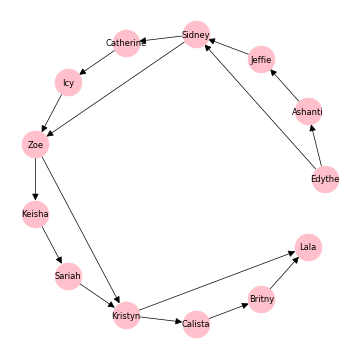


Causal context: A group of friends is considering whether or not to get vaccinated against the flu this year. Edythe will get vaccinated if she had a high fever or bronchitis for at least 4 days in the previous flu season. Ashanti will get vaccinated if she had a high fever or bronchitis for at least 7 days in the previous flu season or if Edythe gets vaccinated. Jeffie will get vaccinated if she had a high fever or bronchitis for at least 6 days in the previous flu season or if Ashanti gets vaccinated. Sidney will get vaccinated if she had a high fever or bronchitis for at least 5 days in the previous flu season or if Edythe gets vaccinated or if Jeffie gets vaccinated. Catherine will get vaccinated if she had a high fever or bronchitis for at least 7 days in the previous flu season or if Sidney gets vaccinated. Icy will get vaccinated if she had a high fever or bronchitis for at least 5 days in the previous flu season and Catherine gets vaccinated. Zoe will get vaccinated if she had

In [21]:
size = [4,4,4,4]
tg = FluVaccine(n_per_bcc = size, 
                bcc_types = ["cycle"]*len(size))
causal_context = tg.get_causal_context()
sample_context = tg.get_sample_context()
print()
print("Causal context:", causal_context)
print()
print("Sample context:", sample_context)
print()
print("- Global cause-effect pairs:", tg.get_global())
print("- Local cause-effect pairs:", tg.get_local())
print("- Compositions:", tg.get_compositions())
print("- Causal functions:", tg.causal_functions)

## Generate dataset

In [31]:
# x levels of graphical complexity (captured by BCC size).
# y tasks per graphical complexity level.
# z samples per task.
# = x*y*z subtasks.
graph_sizes = [[3,3]]
n_tasks_per_size = 1
n_samples_per_task = 1000
reps_per_sample = None

df = dg.get_dataset(task_generator = FluVaccine,
                    graph_sizes = graph_sizes,
                    n_tasks_per_size = n_tasks_per_size,
                    n_samples_per_task = n_samples_per_task, 
                    reps_per_sample = reps_per_sample)

display(df)

,Task ID,Context ID,Sample ID,Nodes per BCC,DAG adjacency matrix,DAG nodes,CCT adjacency matrix,CCT nodes,Exogenous variables,Bernoulli parameters,Global quantity,Local quantities,Compositions,Causal context,Sample context,Factual queries,Interventional queries (cause = True),Interventional queries (cause = False)
0,0.0,0,0,"[3, 3]","[[0, 1, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1...","[Kathyrn, Cristy, Djuana, Holly, Imelda]","[[0, 1, 1], [0, 0, 1], [0, 0, 0]]","[Kathyrn, Djuana, Imelda]","[AXE0, X5XE, 8Z3V, 2XDH, CCJY]","[0.7, 0.7, 0.6, 0.6, 0.5]","(Kathyrn, Imelda)","[(Kathyrn, Djuana), (Djuana, Imelda)]","[[(Kathyrn, Djuana), (Djuana, Imelda)]]",A group of friends is considering whether or n...,"During the previous flu season, Kathyrn had a...",{'Imelda': {'Prompt': 'Did Imelda get vaccinat...,"{('Kathyrn', 'Imelda'): {'Prompt': 'Now, suppo...","{('Kathyrn', 'Imelda'): {'Prompt': 'Now, suppo..."
1,0.1,0,1,"[3, 3]","[[0, 1, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1...","[Kathyrn, Cristy, Djuana, Holly, Imelda]","[[0, 1, 1], [0, 0, 1], [0, 0, 0]]","[Kathyrn, Djuana, Imelda]","[AXE0, X5XE, 8Z3V, 2XDH, CCJY]","[0.7, 0.7, 0.6, 0.6, 0.5]","(Kathyrn, Imelda)","[(Kathyrn, Djuana), (Djuana, Imelda)]","[[(Kathyrn, Djuana), (Djuana, Imelda)]]",A group of friends is considering whether or n...,"During the previous flu season, Kathyrn had a...",{'Imelda': {'Prompt': 'Did Imelda get vaccinat...,"{('Kathyrn', 'Imelda'): {'Prompt': 'Now, suppo...","{('Kathyrn', 'Imelda'): {'Prompt': 'Now, suppo..."
2,0.2,0,2,"[3, 3]","[[0, 1, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1...","[Kathyrn, Cristy, Djuana, Holly, Imelda]","[[0, 1, 1], [0, 0, 1], [0, 0, 0]]","[Kathyrn, Djuana, Imelda]","[AXE0, X5XE, 8Z3V, 2XDH, CCJY]","[0.7, 0.7, 0.6, 0.6, 0.5]","(Kathyrn, Imelda)","[(Kathyrn, Djuana), (Djuana, Imelda)]","[[(Kathyrn, Djuana), (Djuana, Imelda)]]",A group of friends is considering whether or n...,"During the previous flu season, Kathyrn had a...",{'Imelda': {'Prompt': 'Did Imelda get vaccinat...,"{('Kathyrn', 'Imelda'): {'Prompt': 'Now, suppo...","{('Kathyrn', 'Imelda'): {'Prompt': 'Now, suppo..."
3,0.3,0,3,"[3, 3]","[[0, 1, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1...","[Kathyrn, Cristy, Djuana, Holly, Imelda]","[[0, 1, 1], [0, 0, 1], [0, 0, 0]]","[Kathyrn, Djuana, Imelda]","[AXE0, X5XE, 8Z3V, 2XDH, CCJY]","[0.7, 0.7, 0.6, 0.6, 0.5]","(Kathyrn, Imelda)","[(Kathyrn, Djuana), (Djuana, Imelda)]","[[(Kathyrn, Djuana), (Djuana, Imelda)]]",A group of friends is considering whether or n...,"During the previous flu season, Kathyrn had b...",{'Imelda': {'Prompt': 'Did Imelda get vaccinat...,"{('Kathyrn', 'Imelda'): {'Prompt': 'Now, suppo...","{('Kathyrn', 'Imelda'): {'Prompt': 'Now, suppo..."
4,0.4,0,4,"[3, 3]","[[0, 1, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1...","[Kathyrn, Cristy, Djuana, Holly, Imelda]","[[0, 1, 1], [0, 0, 1], [0, 0, 0]]","[Kathyrn, Djuana, Imelda]","[AXE0, X5XE, 8Z3V, 2XDH, CCJY]","[0.7, 0.7, 0.6, 0.6, 0.5]","(Kathyrn, Imelda)","[(Kathyrn, Djuana), (Djuana, Imelda)]","[[(Kathyrn, Djuana), (Djuana, Imelda)]]",A group of friends is considering whether or n...,"During the previous flu season, Kathyrn had a...",{'Imelda': {'Prompt': 'Did Imelda get vaccinat...,"{('Kathyrn', 'Imelda'): {'Prompt': 'Now, suppo...","{('Kathyrn', 'Imelda'): {'Prompt': 'Now, suppo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.995,0,995,"[3, 3]","[[0, 1, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1...","[Kathyrn, Cristy, Djuana, Holly, Imelda]","[[0, 1, 1], [0, 0, 1], [0, 0, 0]]","[Kathyrn, Djuana, Imelda]","[AXE0, X5XE, 8Z3V, 2XDH, CCJY]","[0.7, 0.7, 0.6, 0.6, 0.5]","(Kathyrn, Imelda)","[(Kathyrn, Djuana), (Djuana, Imelda)]","[[(Kathyrn, Djuana), (Djuana, Imelda)]]",A group of friends is considering whether or n...,"During the previous flu season, Kathyrn had s...",{'Imelda': {'Prompt': 'Did Imelda get vaccinat...,"{('Kathyrn', 'Imelda'): {'Prompt': 'Now, suppo...","{('Kathyrn', 'Imelda'): {'Prompt': 'Now, suppo..."
996,0.996,0,996,"[3, 3]","

In [32]:
# Process prompts.
df_factual, df_cf = dg.process_prompts()
display(df_factual)
display(df_cf)

,Task ID,Context ID,Sample ID,Nodes per BCC,Effect,Context,Question,True
0,0.0,0,0,"[3, 3]",Imelda,A group of friends is considering whether or n...,Did Imelda get vaccinated? Begin your response...,0
1,0.0,0,0,"[3, 3]",Djuana,A group of friends is considering whether or n...,Did Djuana get vaccinated? Begin your response...,0
2,0.1,0,1,"[3, 3]",Imelda,A group of friends is considering whether or n...,Did Imelda get vaccinated? Begin your response...,0
3,0.1,0,1,"[3, 3]",Djuana,A group of friends is considering whether or n...,Did Djuana get vaccinated? Begin your response...,0
4,0.2,0,2,"[3, 3]",Imelda,A group of friends is considering whether or n...,Did Imelda get vaccinated? Begin your response...,0
...,...,...,...,...,...,...,...,...
1995,0.997,0,997,"[3, 3]",Djuana,A group of friends is considering whether or n...,Did Djuana get vaccinated? Begin your response...,0
1996,0.998,0,998,"[3, 3]",Imelda,A group of friends is considering whether or n...,Did Imelda get vaccinated? Begin your response...,0
1997,0.998,0,998,"[3, 3]",Djuana,A group of friends is considering whether or n...,Did Djuana get vaccinated? Begin your response...,0
1998,0.999,0,999,"[3, 3]",Imelda,A group of friends is considering whether or n...,Did Imelda get vaccinated? Begin your response...,0


,Task ID,Context ID,Sample ID,Nodes per BCC,Cause-effect pair,Cause,Effect,Context,Question (cause = True),True (cause = True),Question (cause = False),True (cause = False)
0,0.0,0,0,"[3, 3]","(Kathyrn, Imelda)",Kathyrn,Imelda,A group of friends is considering whether or n...,"Now, suppose that Kathyrn got vaccinated regar...",0,"Now, suppose that Kathyrn did not get vaccinat...",0
1,0.0,0,0,"[3, 3]","(Kathyrn, Djuana)",Kathyrn,Djuana,A group of friends is considering whether or n...,"Now, suppose that Kathyrn got vaccinated regar...",0,"Now, suppose that Kathyrn did not get vaccinat...",0
2,0.0,0,0,"[3, 3]","(Djuana, Imelda)",Djuana,Imelda,A group of friends is considering whether or n...,"Now, suppose that Djuana got vaccinated regard...",0,"Now, suppose that Djuana did not get vaccinate...",0
3,0.1,0,1,"[3, 3]","(Kathyrn, Imelda)",Kathyrn,Imelda,A group of friends is considering whether or n...,"Now, suppose that Kathyrn got vaccinated regar...",0,"Now, suppose that Kathyrn did not get vaccinat...",0
4,0.1,0,1,"[3, 3]","(Kathyrn, Djuana)",Kathyrn,Djuana,A group of friends is considering whether or n...,"Now, suppose that Kathyrn got vaccinated regar...",1,"Now, suppose that Kathyrn did not get vaccinat...",0
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.998,0,998,"[3, 3]","(Kathyrn, Djuana)",Kathyrn,Djuana,A group of friends is considering whether or n...,"Now, suppose that Kathyrn got vaccinated regar...",0,"Now, suppose that Kathyrn did not get vaccinat...",0
2996,0.998,0,998,"[3, 3]","(Djuana, Imelda)",Djuana,Imelda,A group of friends is considering whether or n...,"Now, suppose that Djuana got vaccinated regard...",0,"Now, suppose that Djuana did not get vaccinate...",0
2997,0.999,0,999,"[3, 3]","(Kathyrn, Imelda)",Kathyrn,Imelda,A group of friends is considering whether or n...,"Now, suppose that Kathyrn got vaccinated regar...",1,"Now, suppose that Kathyrn did not get vaccinat...",0
2998,0.999,0,999,"[3, 3]","(Kathyrn, Djuana)",Kathyrn,Djuana,A group of friends is considering whether or n...,"Now, suppose that Kathyrn got vaccinated regar...",1,"Now, suppose that Kathyrn did not get vaccinat...",0


In [33]:
pns_dict = dg.get_pns_dict(verbose = True)
pns_dict

-- PNS = 0.283 | ATE = 0.283 --
-- PNS = 0.592 | ATE = 0.592 --
-- PNS = 0.491 | ATE = 0.491 --


{0: {"('Kathyrn', 'Imelda')": 0.283,
  "('Kathyrn', 'Djuana')": 0.592,
  "('Djuana', 'Imelda')": 0.491,
  "[('Kathyrn', 'Djuana'), ('Djuana', 'Imelda')]": 0.290672}}

In [34]:
threshold_dict = dg.get_internal_consistency_thresholds(multiplier = 1.1)
threshold_dict

{0: {"[('Kathyrn', 'Djuana'), ('Djuana', 'Imelda')]": 0.029820494699646698}}

In [35]:
df_cf[df_cf["Context ID"] == 0]

,Task ID,Context ID,Sample ID,Nodes per BCC,Cause-effect pair,Cause,Effect,Context,Question (cause = True),True (cause = True),Question (cause = False),True (cause = False)
0,0.0,0,0,"[3, 3]","(Kathyrn, Imelda)",Kathyrn,Imelda,A group of friends is considering whether or n...,"Now, suppose that Kathyrn got vaccinated regar...",0,"Now, suppose that Kathyrn did not get vaccinat...",0
1,0.0,0,0,"[3, 3]","(Kathyrn, Djuana)",Kathyrn,Djuana,A group of friends is considering whether or n...,"Now, suppose that Kathyrn got vaccinated regar...",0,"Now, suppose that Kathyrn did not get vaccinat...",0
2,0.0,0,0,"[3, 3]","(Djuana, Imelda)",Djuana,Imelda,A group of friends is considering whether or n...,"Now, suppose that Djuana got vaccinated regard...",0,"Now, suppose that Djuana did not get vaccinate...",0
3,0.1,0,1,"[3, 3]","(Kathyrn, Imelda)",Kathyrn,Imelda,A group of friends is considering whether or n...,"Now, suppose that Kathyrn got vaccinated regar...",0,"Now, suppose that Kathyrn did not get vaccinat...",0
4,0.1,0,1,"[3, 3]","(Kathyrn, Djuana)",Kathyrn,Djuana,A group of friends is considering whether or n...,"Now, suppose that Kathyrn got vaccinated regar...",1,"Now, suppose that Kathyrn did not get vaccinat...",0
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.998,0,998,"[3, 3]","(Kathyrn, Djuana)",Kathyrn,Djuana,A group of friends is considering whether or n...,"Now, suppose that Kathyrn got vaccinated regar...",0,"Now, suppose that Kathyrn did not get vaccinat...",0
2996,0.998,0,998,"[3, 3]","(Djuana, Imelda)",Djuana,Imelda,A group of friends is considering whether or n...,"Now, suppose that Djuana got vaccinated regard...",0,"Now, suppose that Djuana did not get vaccinate...",0
2997,0.999,0,999,"[3, 3]","(Kathyrn, Imelda)",Kathyrn,Imelda,A group of friends is considering whether or n...,"Now, suppose that Kathyrn got vaccinated regar...",1,"Now, suppose that Kathyrn did not get vaccinat...",0
2998,0.999,0,999,"[3, 3]","(Kathyrn, Djuana)",Kathyrn,Djuana,A group of friends is considering whether or n...,"Now, suppose that Kathyrn got vaccinated regar...",1,"Now, suppose that Kathyrn did not get vaccinat...",0


In [36]:
#df.to_csv("flu_vaccine_test.csv", index = False)
#df_factual.to_csv("flu_vaccine_test_factual.csv", index = False)
#df_cf.to_csv("flu_vaccine_test_counterfactual.csv", index = False)

In [37]:
test = df_cf[["Context", "Question (cause = False)", "True (cause = False)"]]
test.head()

,Context,Question (cause = False),True (cause = False)
0,A group of friends is considering whether or n...,"Now, suppose that Kathyrn did not get vaccinat...",0
1,A group of friends is considering whether or n...,"Now, suppose that Kathyrn did not get vaccinat...",0
2,A group of friends is considering whether or n...,"Now, suppose that Djuana did not get vaccinate...",0
3,A group of friends is considering whether or n...,"Now, suppose that Kathyrn did not get vaccinat...",0
4,A group of friends is considering whether or n...,"Now, suppose that Kathyrn did not get vaccinat...",0


In [38]:
for col in test.columns:
    print(test[col][0])
    print()

A group of friends is considering whether or not to get vaccinated against the flu this year. Kathyrn will get vaccinated if she had a high fever or bronchitis for at least 7 days in the previous flu season. Cristy will get vaccinated if she had a high fever or bronchitis for at least 7 days in the previous flu season or if Kathyrn gets vaccinated. Djuana will get vaccinated if she had a high fever or bronchitis for at least 6 days in the previous flu season and Kathyrn gets vaccinated and Cristy gets vaccinated. Holly will get vaccinated if she had a high fever or bronchitis for at least 6 days in the previous flu season or if Djuana gets vaccinated. Imelda will get vaccinated if she had a high fever or bronchitis for at least 5 days in the previous flu season and Djuana gets vaccinated and Holly gets vaccinated. During the previous flu season, Kathyrn had a low-grade fever for 4 days, bronchitis for 5 days, stomach pain for 6 days, a high fever for 5 days, a runny nose for 1 days, an

## End of document